In [1]:
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tqdm import tqdm

### Reading in data
- NetworkX supports multiple data formats
- https://networkx.org/documentation/stable/reference/readwrite/index.html


In [2]:
!head Na-O\ network/1.GraphGeod

3 1115 0 0 0 1 1 2.726
262 1115 0 0 0 1 1 2.762
313 1115 0 0 0 1 1 2.428
557 1115 0 0 0 1 1 2.494
895 1115 0 0 0 1 1 2.256
905 1115 0 0 0 1 1 2.487
990 1115 0 0 0 1 1 2.093
202 1116 0 0 0 1 1 2.711
203 1116 0 0 0 1 1 2.572
217 1116 0 0 0 1 1 2.726


In [3]:
G = nx.read_edgelist("Na-O network/1.GraphGeod", nodetype=int, data=False)

In [4]:
# G.nodes()
# G.edges()

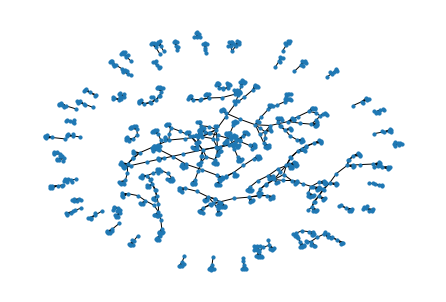

In [5]:
# A quick plot
nx.draw(G, node_size=10)
# nx.draw(G)

In [6]:
# 1 - 459 Ow
# 460 - 1114 On
# 1115-1267 Na
node_colors = {i: "red" for i in range(1, 460)}
node_labels = {i: "Ow" for i in range(1, 460)}
node_colors.update({i: "green" for i in range(460, 1115)})
node_labels.update({i: "On" for i in range(460, 1115)})
node_colors.update({i: "blue" for i in range(1115, 1268)})
node_labels.update({i: "Na" for i in range(1115, 1268)})

In [7]:
# node_labels

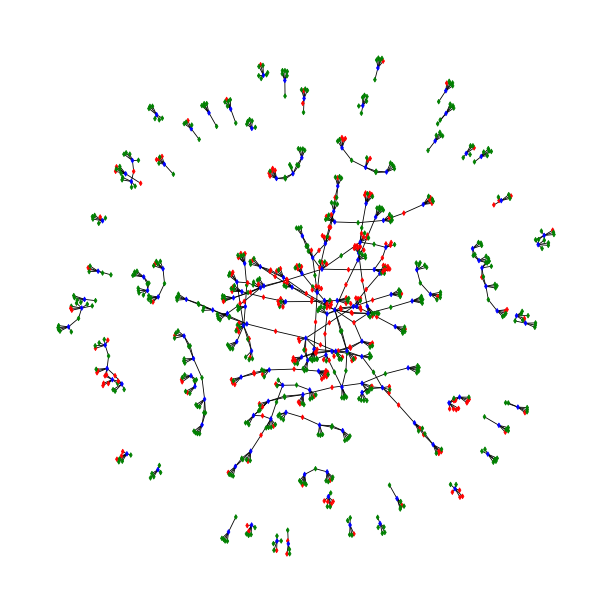

In [8]:
plt.figure(figsize=(10, 10), dpi=60)
nx.draw(G, node_size=15, node_color=[node_colors[i] for i in G.nodes], node_shape="d")

## Attributes

In [9]:
# node_labels

In [10]:
nx.set_node_attributes(G, node_labels, "element")

In [11]:
# G.nodes()

In [12]:
# G.nodes.data()
# G.nodes(data=True)

In [13]:
# nx.get_node_attributes(G, "element")

### Exercise

Find the total number of `Ow`, `Na` and `On` elements in the network `G`.

## Connected Components

The various little clusters we see in our network.

In [14]:
nx.connected_components(G)

<generator object connected_components at 0x10e9beba0>

In [15]:
len(list(nx.connected_components(G)))

63

In [16]:
components = [nx.subgraph(G, component) for component in nx.connected_components(G)]

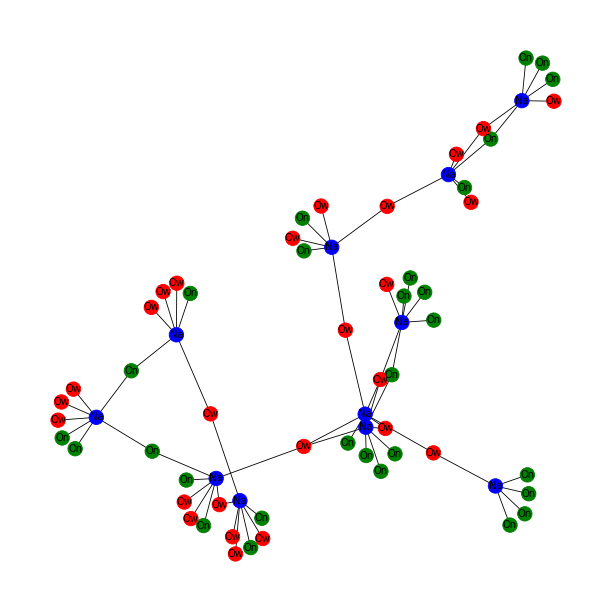

In [17]:
# Different components
H = components[10]
plt.figure(figsize=(10, 10), dpi=60)
nx.draw(
    H,
    node_color=[node_colors[i] for i in H.nodes],
    labels={i: node_labels[i] for i in H.nodes},
)

## Unique structures

In [18]:
# https://www.graphclasses.org/smallgraphs.html#nodes4
nodes = [1, 2, 3, 4]
edges = [
    # [],
    # [(3, 4)],
    # [(1, 2), (2, 3)],
    # [(1, 2), (3, 4)],
    [(1, 2), (1, 3), (1, 4)],
    [(1, 2), (2, 3), (3, 4)],
    [(1, 2), (1, 3), (3, 2), (4, 1), (4, 3)],
    [(1, 2), (2, 3), (3, 1), (1, 4)],
    [(1, 2), (2, 3), (3, 4), (4, 1)],
    # [(1, 2), (2, 3), (3, 1)],
    [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (4, 2)],
]

[0.17342314200454556, 0.17342314200454556, 0.17342314200454556, 0.4797305739863631]


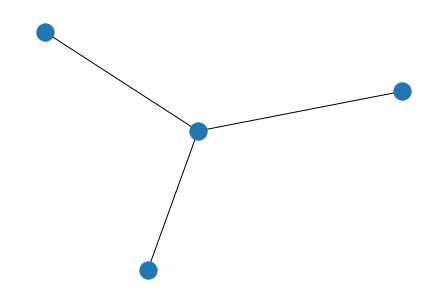

[0.17543839772251532, 0.17543839772251532, 0.32456160227748454, 0.32456160227748454]


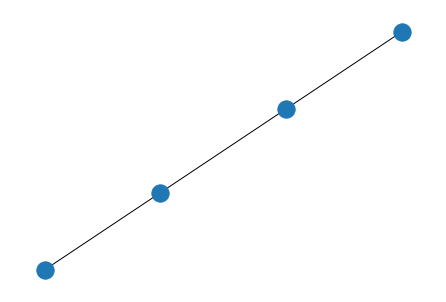

[0.20478693540661064, 0.20478693540661064, 0.29521306459338925, 0.29521306459338925]


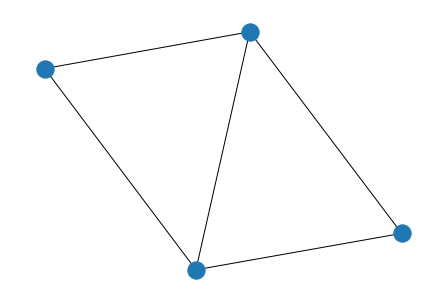

[0.1414087555444403, 0.2459279727012903, 0.2459279727012903, 0.3667352990529791]


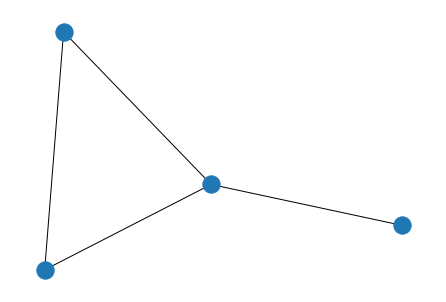

[0.25, 0.25, 0.25, 0.25]


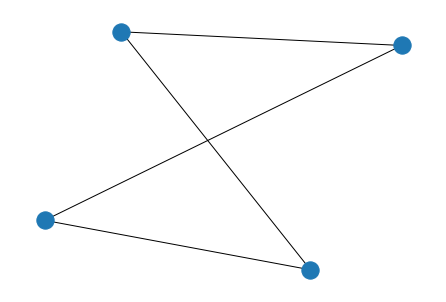

[0.25, 0.25, 0.25, 0.25]


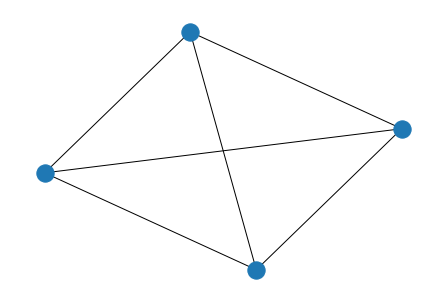

In [19]:
for edge in edges:
    H = nx.Graph()
    # H.add_nodes_from(nodes)
    H.add_edges_from(edge)
    print(sorted(nx.pagerank(H).values()))
    nx.draw(H)
    plt.show()

In [20]:
# Differenet components
PR_components = defaultdict(list)
for H in components:
    PR_components[hash(tuple(sorted(nx.pagerank(H).values())))].append(H)

In [21]:
# PR_components

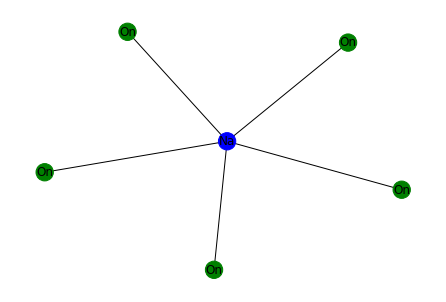

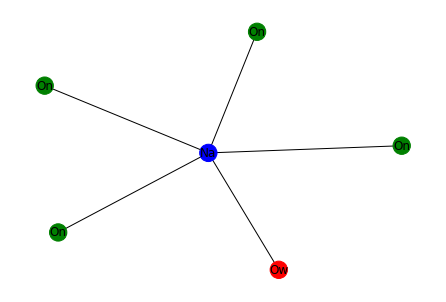

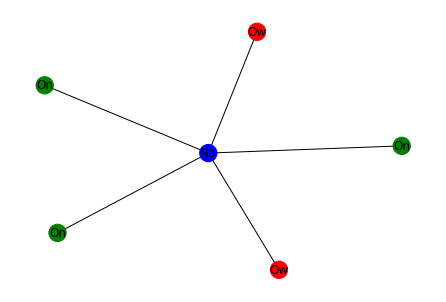

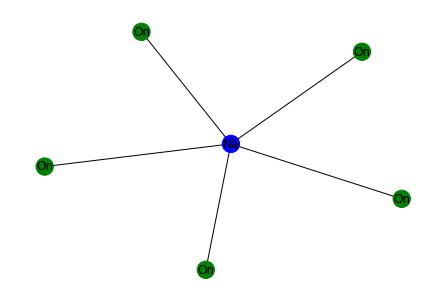

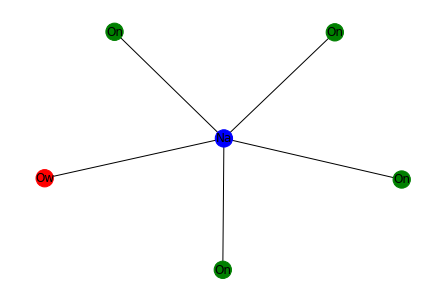

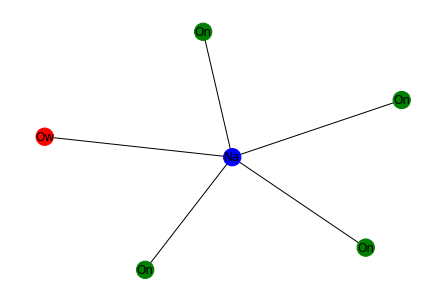

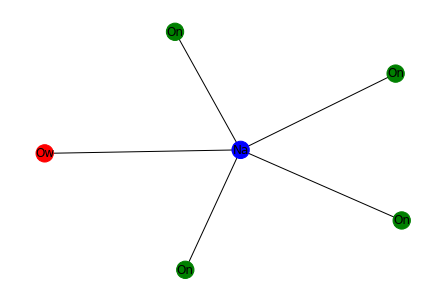

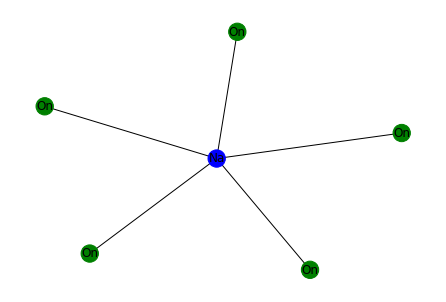

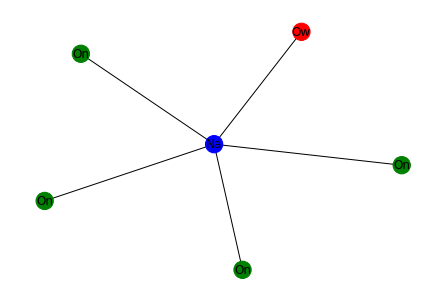

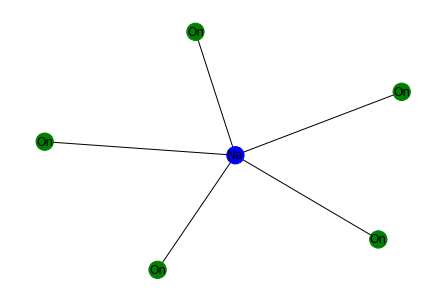

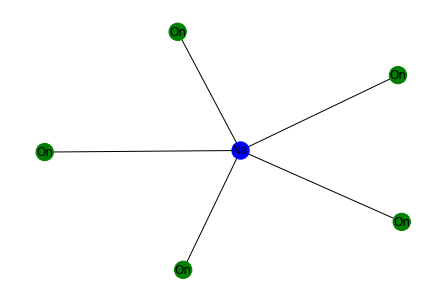

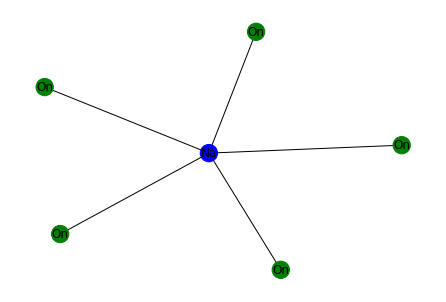

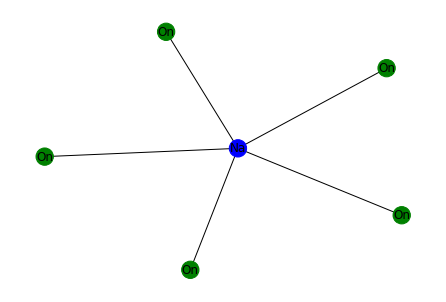

In [22]:
for H in PR_components[1906517026919754137]:
    nx.draw(
        H,
        node_color=[node_colors[i] for i in H.nodes],
        labels={i: node_labels[i] for i in H.nodes},
    )
    plt.show()

## Temporal evolution of the network

In [25]:
evolution = 2000
NaO = (
    nx.read_edgelist(f"Na-O network/{t}.GraphGeod", nodetype=int, data=False)
    for t in range(1, evolution + 1)
)

In [26]:
data = list()
for H in tqdm(NaO, total=evolution):
    largest_cc = max(nx.connected_components(H), key=len)
    data.append(len(largest_cc))

100%|██████████████████████████████████████| 2000/2000 [00:12<00:00, 164.15it/s]


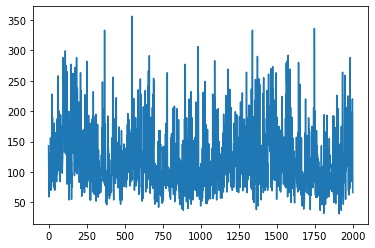

In [27]:
plt.plot(range(evolution), data)

In [28]:
evolution = 2000
NaO = (
    nx.read_edgelist(f"Na-O network/{t}.GraphGeod", nodetype=int, data=False)
    for t in range(1, evolution + 1)
)


data = defaultdict(list)
for H in tqdm(NaO, total=evolution):
    nx.set_node_attributes(H, node_labels, "element")
    counts = Counter(nx.get_node_attributes(H, "element").values())
    data["On"].append(counts["On"])
    data["Ow"].append(counts["Ow"])
    data["Na"].append(counts["Na"])

100%|██████████████████████████████████████| 2000/2000 [00:13<00:00, 146.46it/s]


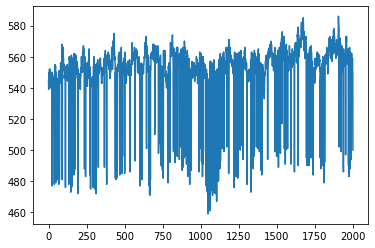

In [29]:
plt.plot(range(evolution), data["On"])

### Excercise

Plot the evolution of number of `Ow` and `Na` nodes in the network dataset.

## Shortest Paths

Distribution of shortest path length between all nodes in a network

In [36]:
H = nx.path_graph(4)

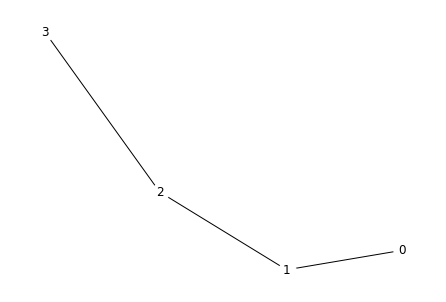

In [37]:
nx.draw(H, with_labels=True, node_color="white")

In [38]:
length = list(nx.all_pairs_shortest_path_length(G))
bag = list()
for i in length:
    bag.extend(list(i[1].values()))

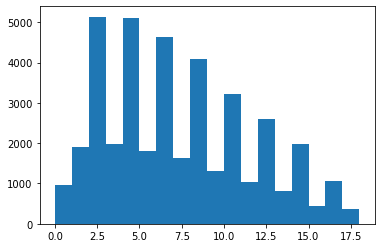

In [39]:
plt.hist(bag, bins=max(bag))
plt.show()